# 🧠 Golden-Bit Heartbeat Testbed
Levels 1–3: Fibonacci Word, De Bruijn Saturation, α-Scaling, and φ⁻² Bit Emergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Rational, sqrt, pi, N
from decimal import Decimal, getcontext
getcontext().prec = 50

## 🔁 Fibonacci Word Generator

In [2]:
def fibonacci_word(n):
    a, b = "0", "01"
    for _ in range(n - 1):
        a, b = b, b.replace("0", "temp").replace("1", "0").replace("temp", "01")
    return b

def count_ones(binary_str):
    return binary_str.count("1")

fib_str = fibonacci_word(10)
print(fib_str[:80] + "...")
print("Length:", len(fib_str), "Ones:", count_ones(fib_str))

01001010010010100101001001010010010100101001001010010100100101001001010010100100...
Length: 144 Ones: 55


## 🔀 De Bruijn Sequence Generator

In [3]:
def de_bruijn(k, n):
    a = [0] * k * n
    sequence = []

    def db(t, p):
        if t > n:
            if n % p == 0:
                sequence.extend(a[1:p+1])
        else:
            a[t] = a[t - p]
            db(t + 1, p)
            for j in range(a[t - p] + 1, k):
                a[t] = j
                db(t + 1, t)

    db(1, 1)
    return ''.join(map(str, sequence))

db_str = de_bruijn(2, 5)
print(db_str[:80] + "...")
print("Length:", len(db_str), "Ones:", count_ones(db_str))

00000100011001010011101011011111...
Length: 32 Ones: 16


## 🧮 Fibonacci Bit Density vs Powers of 3

In [4]:
phi = (1 + sqrt(5)) / 2
fib_density = 1 / phi**2
fib_density_eval = N(fib_density, 30)

def bits_needed(target_ones):
    return float(target_ones / fib_density_eval)

powers_of_3 = [3**i for i in range(1, 7)]
bit_requirements = [(p, bits_needed(p)) for p in powers_of_3]

for power, bits in bit_requirements:
    print(f" 3^{int(np.log(power)/np.log(3))} = {power}, Bits Needed ≈ {bits:.6f}")

 3^1 = 3, Bits Needed ≈ 7.854102
 3^2 = 9, Bits Needed ≈ 23.562306
 3^3 = 27, Bits Needed ≈ 70.686918
 3^4 = 81, Bits Needed ≈ 212.060753
 3^4 = 243, Bits Needed ≈ 636.182259
 3^6 = 729, Bits Needed ≈ 1908.546778


## 🔬 α-Scaling and Symbolic Compression

In [5]:
alpha_inv = 137.035999
alpha_scaled = alpha_inv / 1000
alpha_x_729 = alpha_scaled * 729
alpha_x_81 = alpha_scaled * 81
symbolic_delta = 0.10010562673
delta_div_81 = symbolic_delta / 81
delta_div_729 = symbolic_delta / 729

print(" α⁻¹ / 1000 =", alpha_scaled)
print(" α⁻¹ × 729 / 1000 =", alpha_x_729)
print(" α⁻¹ × 81 / 1000 =", alpha_x_81)
print(" Symbolic Δ =", symbolic_delta)
print(" Δ / 81 =", delta_div_81)
print(" Δ / 729 =", delta_div_729)

 α⁻¹ / 1000 = 0.137035999
 α⁻¹ × 729 / 1000 = 99.89924327099999
 α⁻¹ × 81 / 1000 = 11.099915918999999
 Symbolic Δ = 0.10010562673
 Δ / 81 = 0.0012358719349382715
 Δ / 729 = 0.00013731910388203018


## 📊 Visualization of Fibonacci Bit Emergence

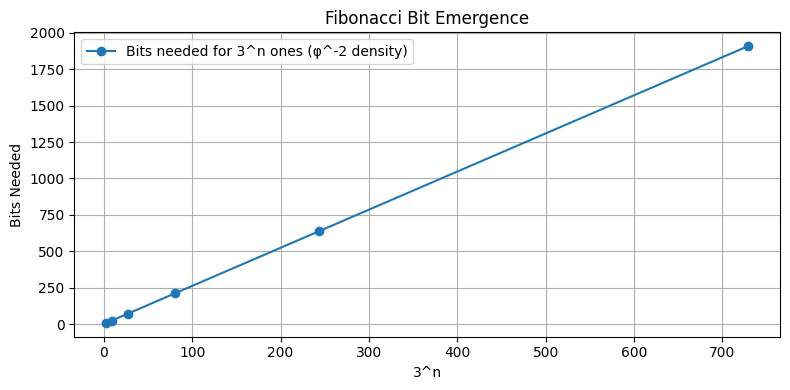

In [6]:
bits = [bits for _, bits in bit_requirements]
plt.figure(figsize=(8,4))
plt.plot(powers_of_3, bits, 'o-', label='Bits needed for 3^n ones (φ^-2 density)')
plt.xlabel('3^n')
plt.ylabel('Bits Needed')
plt.title('Fibonacci Bit Emergence')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()